## TASK 1 
1. Load the dataset Q1.csv. It contains the exam scores (in percentages) of a sample of 50 students
from a Dublin secondary school.
a. Find and comment on important summary statistics and produce an appropriate plot to
summarise the dataset.
b. One of the teachers is concerned about the performance of the students in the school. She
suspects that their performance may be below the reported national average of 70%. Does
the data show that her concerns are justified? Use a significance level of alpha = 0.05.
c. Produce and comment on an appropriate plot to illustrate your findings. 

The next 3 steps contain me loading important libraries, loading the dataset and displaying the first 5 rows and checking for missing values, i do this to inspect and understand the structureof the dataset.

In [1]:
import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as stats

In [2]:
#load the dataset that i will be using for the report
df = pd.read_csv("Q1.csv")

In [3]:
df.head()

,exam_score
0,74.54
1,66.20
2,86.75
3,70.87
4,80.43


In [4]:
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
exam_score    0
dtype: int64


Next i will be performing summary statisticsto have an insite into the central tendency, the dispersion and distribution of the dataset which is very important to understanding student perfomance.

In [5]:
#summary statistics
sum_stats = df.describe()

In [6]:
#Display summary stastics
sum_stats

,exam_score
count,50.000000
mean,68.735600
std,9.750143
min,48.730000
25%,62.040000
50%,68.390000
75%,74.630000
max,87.360000


A histogram is plotted to see the exam score distribution amongst the students

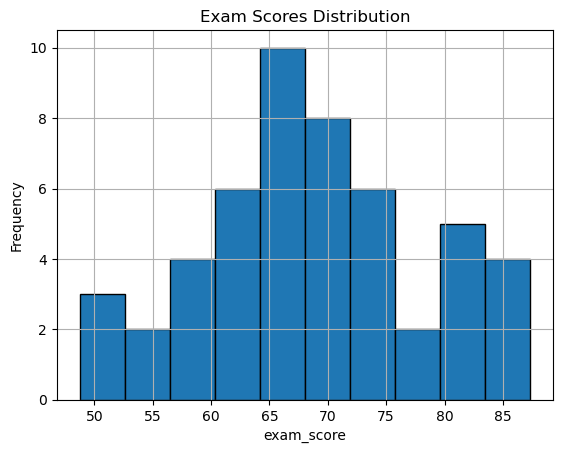

In [7]:
#Plot a histogram of the exam scores in the dataset
plt.hist(df['exam_score'], bins=10, edgecolor='black')
plt.title('Exam Scores Distribution')
plt.xlabel('exam_score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Below a one sample t-test is executed to compare the sample mean to the national average to see if student perfomance is significantly below 70%.A negative t-statistic indicates that the sample mean is less than the national average.The pvalue is greater that 0.05 meaning that there is insufficient evidence to to come to the conclusion that the mean exam score in the sample is less than the national average of 70%.In conclusion there is no evidence to prove that the students' mean score is below national average.

In [8]:
#Hypothesis Testing
national_average = 70
t_stat, p_value = stats.ttest_1samp(df['exam_score'], national_average, alternative='less')
t_stat, p_value

(-0.9169771399834613, 0.18182298516031403)

In [9]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is evidence to suggest that the mean score is below the national average of 70%.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest that the mean score is below the national average of 70%.")

Fail to reject the null hypothesis. There is not enough evidence to suggest that the mean score is below the national average of 70%.


The histogram visualization is to give a visual summary of the distribution of exam scores amongst the students and to highlight the national average for conmparison sake. 

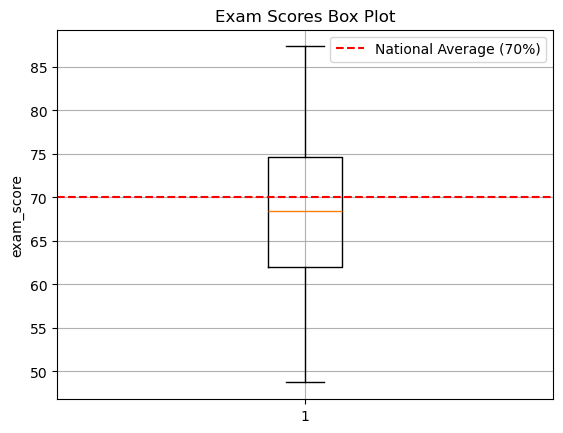

In [10]:
#Plot a histogram of the exam scores in the dataset
plt.boxplot(df['exam_score'])
plt.axhline(y=national_average, color='r', linestyle='--', label='National Average (70%)')
plt.title('Exam Scores Box Plot')
plt.ylabel('exam_score')
plt.legend()
plt.grid(True)
plt.show()

## TASK 2
Load the diamonds dataset, and print the first 5 rows. The color variable refers to the colour of the
diamond, with categories from “D” to “J”. Colourless diamonds are considered better than
diamonds with a yellow tint. Diamonds from “D” to “F” are considered colourless, and diamonds
from colour “G” to “J” are not considered colourless (that is, they have a very faint colour).
a. Create a new binary variable in the dataframe called “colourless” which records 1 in rows
with colourless diamonds and 0 otherwise.
b. Perform an appropriate hypothesis test to determine whether there is any association
between the clarity of a diamond and whether it is colourless or not. Use a significance
level of alpha = 0.01.
c. Produce and comment on an appropriate plot to illustrate your findings.
d. Find and interpret 90% confidence intervals for both the mean price of colourless diamonds
and the mean price of non-colourless diamonds. 

The next 3 steps contain me loading important libraries, loading the dataset and displaying the first 5 rows and checking for missing values, i do this to inspect and understand the structureof the dataset.

In [11]:
import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, norm


In [12]:
#load the dataset that i will be using for the report
df = pd.read_csv("diamonds.csv")

In [13]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


The next 4 cells i clean up the dataset to ensure that no missing values, nan values aaffect my final results and luckily there wer no missing values in the dataset.

In [14]:
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [15]:
print(df.isna().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [16]:
df = df.dropna()

In [17]:
print(df.isna().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [18]:
print(df.dtypes)

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


In [19]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [20]:
df = df.dropna(subset=['price'])

The next 7 columns i will be dealing with the color column of my dataset which can be divided into  "color" or "colourless", i investigate the unique values in the column and i create a new binary variable to classify diamonds as colourless or not to visualization and hypothesis testing easier.

In [21]:
print("Unique value in the 'color' column:")
print(df['color'].unique())

Unique value in the 'color' column:
['E' 'I' 'J' 'H' 'F' 'G' 'D']


In [22]:
df['color'] = df['color'].astype(str)

In [23]:
#print("Unique value in the 'colourless' column:")
#print(df['colourless'].unique())

In [24]:
# i create a new binary variable  called "colourless"
df['colourless'] = df['color'].apply(lambda x: 1 if x in ['D', 'E', 'F'] else 0)

In [25]:
df['colourless'] = df['colourless'].astype(str)

In [26]:

# Create a new binary variable "colourless"
#df['colourless'] = df['color'].apply(lambda x: 1 if x in ['D', 'I', 'J', 'H', 'G','E', 'F'] else 0)

In [27]:
print("Unique value in the 'colourless' column:")
print(df['colourless'].unique())
print(df[['color', 'colourless']].head(10))

Unique value in the 'colourless' column:
['1' '0']
  color colourless
0     E          1
1     E          1
2     E          1
3     I          0
4     J          0
5     J          0
6     I          0
7     H          0
8     E          1
9     H          0


In [28]:
# i create a new binary variable  called "colourless"
#df['colourless'] = df['color'].apply(lambda x: 1 if x in ['D', 'E', 'F'] else 0)

In [29]:
# I perform chi squared to find out the association bbetween clarity and colourlessness
contingency_table = pd.crosstab(df['clarity'], df['colourless'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-squared test statistic: {chi2}, p-vaue: {p}")


Chi-squared test statistic: 486.47305941485223, p-vaue: 6.481587124454715e-101


The chi squared test to asess whether the is a relationship between diamond clarity and being colourless.P-value is more than 0.01 so there is no association between clarity and colourlessness.

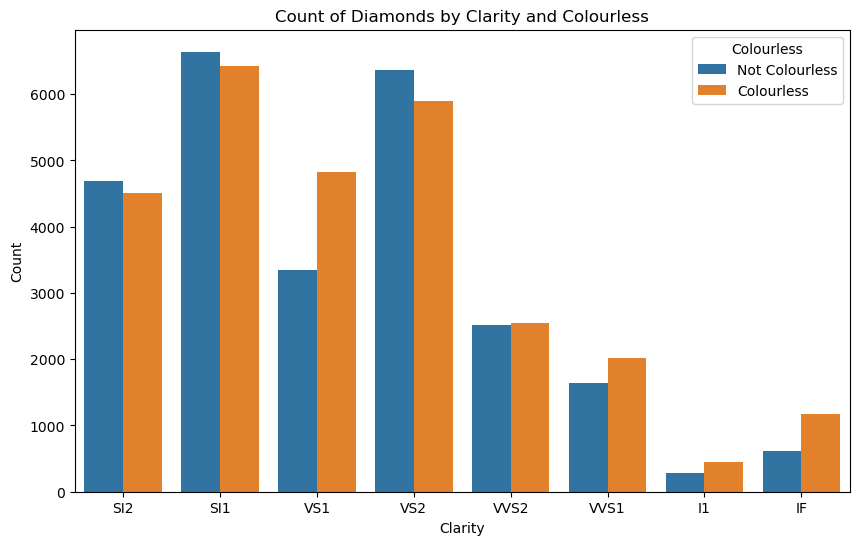

In [30]:
df['colourless'] = df['colourless'].astype(str)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='clarity', hue='colourless')
plt.title('Count of Diamonds by Clarity and Colourless')
plt.xlabel('Clarity')
plt.ylabel('Count')
plt.legend(title='Colourless', loc='upper right', labels=['Not Colourless', 'Colourless'])
plt.show()

The bar chart is to visually show thdistribution of diamonds by colourlessness, clarity.

In [31]:
#I calculate the 90% confidence intervals for mean price of colourless and non colourless diamonds
colourless_prices = df[df['colourless'] == '1']['price']
non_colourless_prices = df[df['colourless']== '0']['price']

In [32]:
print("Colourless prices summary statistics:")
print(colourless_prices.describe())
print("Non-colourless prices summary statistics:")
print(non_colourless_prices.describe())

Colourless prices summary statistics:
count    26114.000000
mean      3337.759401
std       3527.047348
min        326.000000
25%        919.000000
50%       1938.500000
75%       4372.000000
max      18791.000000
Name: price, dtype: float64
Non-colourless prices summary statistics:
count    27826.000000
mean      4491.230073
std       4305.086420
min        334.000000
25%        998.000000
50%       3070.000000
75%       6334.000000
max      18823.000000
Name: price, dtype: float64


In [33]:
print(df["price"])

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64


In [34]:
#print(color['prices'].describe())

In [35]:
#print(colourless_prices.describe())

In [36]:
#df["price"].fillna(df["price"].mean(), inplace=True)

Confidence intervals give the range with the true mean price of colourless abd non-colourless diamonds is more than likely to fall and this gives more insight into the price differences amongst those categories.These intervals provide strong evidence that non-colourless diamonds command a higher mean price than colourless ones.


In [37]:
def confidence_interval(data, confidence=0.90):
    mean = np.mean(data)
    sem= np.std(data, ddof=1) / np.sqrt(len(data))
    margin_of_error = sem * norm.ppf((1 + confidence) / 2)
    return mean - margin_of_error, mean + margin_of_error

In [38]:
chi_colourless = confidence_interval(colourless_prices)
chi_non_colourless = confidence_interval(non_colourless_prices)

In [39]:
print(f"\n90% CHI for colourless diamonds' mean price: {chi_colourless}")
print(f"90% CHI for non-colourless diamonds' mean price: {chi_non_colourless}")


90% CHI for colourless diamonds' mean price: (3301.858789536041, 3373.660012639037)
90% CHI for non-colourless diamonds' mean price: (4448.779481651932, 4533.680663536022)


## TASK 3
Load the PlantGrowth dataset from the pydataset library. It contains the results of a small study
comparing the yields of plants obtained under a control and under two different treatment
conditions.
a. Find and comment on important summary statistics by treatment and produce an
appropriate plot to summarise the dataset.
b. Conduct an appropriate hypothesis test to see if there is evidence of a difference between
the three means (that is, the control and the two treatments). Use a significance level of
alpha = 0.05.
c. If there is evidence of a difference between the three means, find and comment on where
this difference may be.

In [40]:
import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [41]:
#load the dataset that i will be using for the report
df = pd.read_csv("PlantGrowth.csv")

In [42]:
df.head(10)

,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


In [43]:
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
rownames    0
weight      0
group       0
dtype: int64


In [44]:
print(df.isna().sum())

rownames    0
weight      0
group       0
dtype: int64


In [45]:
df = df.dropna()

In [46]:
print(df.isna().sum())

rownames    0
weight      0
group       0
dtype: int64


In [47]:
print(df['group'].unique())

['ctrl' 'trt1' 'trt2']


In [48]:
print(df['rownames'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


In [49]:
summary_stats = df.groupby('group').describe()
print(summary_stats)

      rownames                                                weight         \
         count  mean      std   min    25%   50%    75%   max  count   mean   
group                                                                         
ctrl      10.0   5.5  3.02765   1.0   3.25   5.5   7.75  10.0   10.0  5.032   
trt1      10.0  15.5  3.02765  11.0  13.25  15.5  17.75  20.0   10.0  4.661   
trt2      10.0  25.5  3.02765  21.0  23.25  25.5  27.75  30.0   10.0  5.526   

                                                    
            std   min     25%    50%     75%   max  
group                                               
ctrl   0.583091  4.17  4.5500  5.155  5.2925  6.11  
trt1   0.793676  3.59  4.2075  4.550  4.8700  6.03  
trt2   0.442573  4.92  5.2675  5.435  5.7350  6.31  


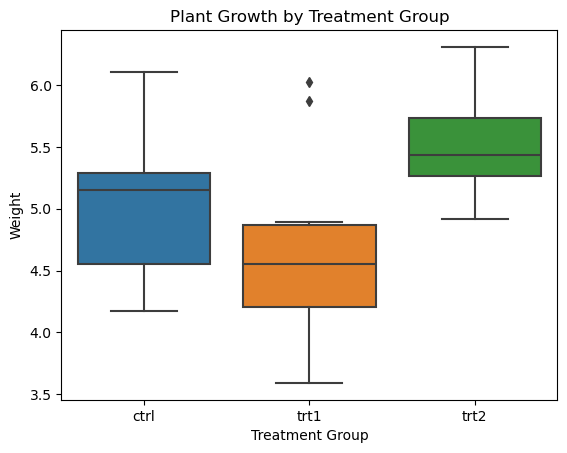

In [50]:
sns.boxplot(data=df,x='group', y='weight')
plt.title('Plant Growth by Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Weight')
plt.show()

In [51]:
group1 = df[df['group'] == 'ctrl']['weight']
group2 = df[df['group'] == 'trt1']['weight']
group3 = df[df['group'] == 'trt2']['weight']

In [52]:
f_stat, p_value = f_oneway(group1, group2, group3)
print(f"ANOVA test statistic: {f_stat}, p-value: {p_value}")

ANOVA test statistic: 4.846087862380136, p-value: 0.0159099583256229


In [53]:
print(df.dtypes)

rownames      int64
weight      float64
group        object
dtype: object


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3909 -1.0622 0.3202  False
  ctrl   trt2    0.494  0.198 -0.1972 1.1852  False
  trt1   trt2    0.865  0.012  0.1738 1.5562   True
---------------------------------------------------


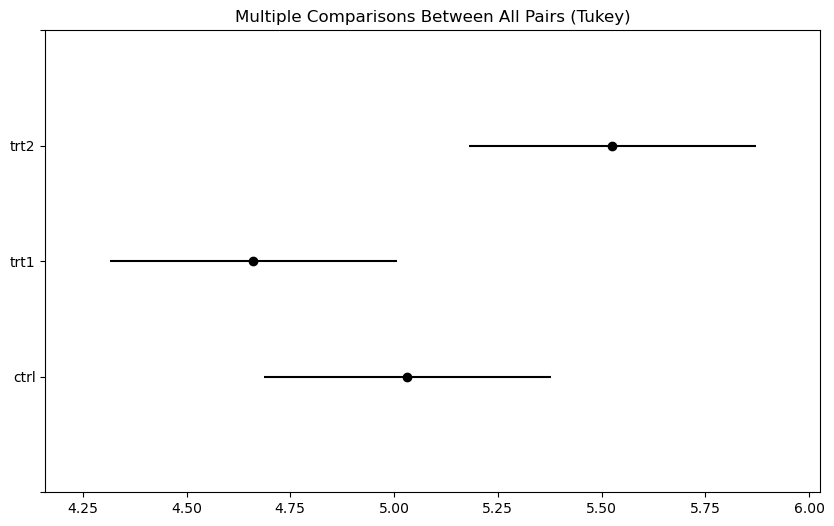

In [54]:
if p_value < 0.05:
    tukey_results = pairwise_tukeyhsd(df['weight'], df['group'])
    print(tukey_results)
    tukey_results.plot_simultaneous()
    plt.show()

## TASK 4
Load the trees dataset from the pydataset library. It contains measurements of the diameter,
height and volume of timber in 31 felled black cherry trees. Note that the diameter (in inches) is
labelled girth in the dataset. It is measured at 4 foot 6 inches above the ground.
a. Perform a correlation analysis between all numerical variables. Include and comment on
the results of hypothesis tests for the population correlation coefficients between all three
pairs of variables (you can use the pearsonr function from the scipy.stats library).
b. There is interest in estimating the volume of timber from trees using either the girth or the
height of the trees, or both. Perform a regression analysis to decide which of the three
possible models you would recommend using. Interpret your results and provide a short
conclusion of your findings.


In [55]:
import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm

In [56]:
#load the dataset that i will be using for the report
df = pd.read_csv("trees.csv")

In [57]:
df.head()

,rownames,Girth,Height,Volume
0,1,8.3,70,10.3
1,2,8.6,65,10.3
2,3,8.8,63,10.2
3,4,10.5,72,16.4
4,5,10.7,81,18.8


In [58]:
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
rownames    0
Girth       0
Height      0
Volume      0
dtype: int64


In [59]:
print(df.isna().sum())

rownames    0
Girth       0
Height      0
Volume      0
dtype: int64


In [60]:
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
          rownames     Girth    Height    Volume
rownames  1.000000  0.967207  0.467204  0.903349
Girth     0.967207  1.000000  0.519280  0.967119
Height    0.467204  0.519280  1.000000  0.598250
Volume    0.903349  0.967119  0.598250  1.000000


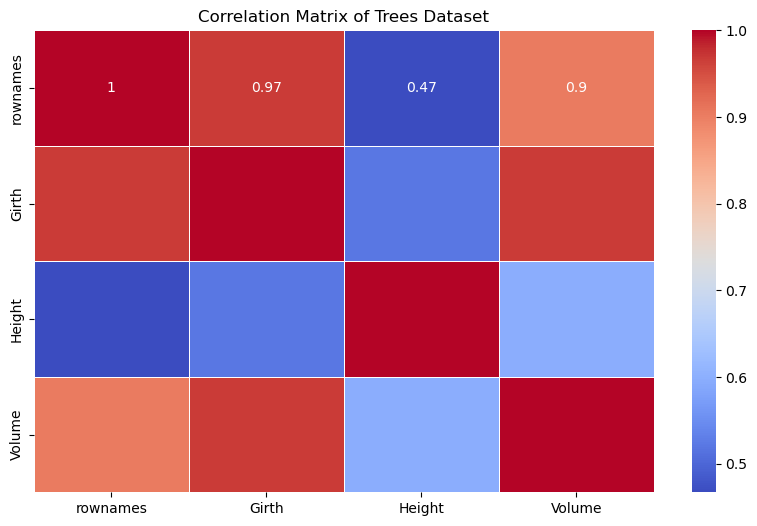

In [61]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Trees Dataset')
plt.show()

In [62]:
corr_girth_height, p_girth_height = pearsonr(df['Girth'], df['Height'])
print(f"Girth-Height correlation: {corr_girth_height}, p-value: {p_girth_height}")

Girth-Height correlation: 0.5192800719499373, p-value: 0.0027578147930576663


In [63]:
corr_girth_volume, p_girth_volume = pearsonr(df['Girth'], df['Volume'])
print(f"Girth-Volume correlation: {corr_girth_volume}, p-value: {p_girth_volume}")

Girth-Volume correlation: 0.9671193682556305, p-value: 8.6443342117705775e-19


In [64]:
corr_height_volume, p_height_volume = pearsonr(df['Height'], df['Volume'])
print(f"Height-Volume correlation: {corr_height_volume}, p-value: {p_height_volume}")

Height-Volume correlation: 0.5982496519917821, p-value: 0.0003783823479184885


In [65]:
X_girth = sm.add_constant(df['Girth'])
model_girth = sm.OLS(df['Volume'], X_girth).fit()
print("Regression results for Volume ~ Girth")
print(model_girth.summary())

Regression results for Volume ~ Girth
                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     419.4
Date:                Sat, 18 May 2024   Prob (F-statistic):           8.64e-19
Time:                        18:28:02   Log-Likelihood:                -87.822
No. Observations:                  31   AIC:                             179.6
Df Residuals:                      29   BIC:                             182.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -

In [66]:
X_height = sm.add_constant(df['Height'])
model_height = sm.OLS(df['Volume'], X_height).fit()
print("Regression results for Volume ~ Height")
print(model_height.summary())

Regression results for Volume ~ Height
                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     16.16
Date:                Sat, 18 May 2024   Prob (F-statistic):           0.000378
Time:                        18:28:02   Log-Likelihood:                -123.40
No. Observations:                  31   AIC:                             250.8
Df Residuals:                      29   BIC:                             253.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        

In [67]:
X_both = sm.add_constant(df[['Girth', 'Height']])
model_both = sm.OLS(df['Volume'], X_both).fit()
print("Regression results for Volume ~ Girth + Height")
print(model_both.summary())

Regression results for Volume ~ Girth + Height
                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     255.0
Date:                Sat, 18 May 2024   Prob (F-statistic):           1.07e-18
Time:                        18:28:02   Log-Likelihood:                -84.455
No. Observations:                  31   AIC:                             174.9
Df Residuals:                      28   BIC:                             179.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

In [68]:
print("Model comparison based on R-squared value:")
print(f"Volume ~ Girth: R-squared = {model_girth.rsquared}")
print(f"Volume ~ Height: R-squared = {model_height.rsquared}")
print(f"Volume ~ Girth + Height: R-squared = {model_both.rsquared}")


Model comparison based on R-squared value:
Volume ~ Girth: R-squared = 0.9353198724551699
Volume ~ Height: R-squared = 0.3579026461082886
Volume ~ Girth + Height: R-squared = 0.9479500377816745
